# Performance Measures of Classification 

Let X1, X2, .... ,  Xn are features.

Let Z= b0 + b1 X1 + b2 X2 + .... + bn Xn 

     $ f(Z)=\frac {e^{Z}} {(1+e^{Z})} $

f(Z) = e^Z / (1+e^Z) always lies between 0 and 1.

Its shape 

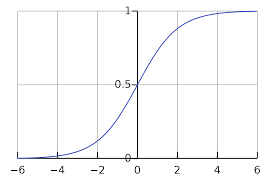

Logistic or sigmoid function.


We can regard this as probability.

Binary classification: only two classes

We call it as 0 and 1.

If 0< f(Z)< 0.5 ===> Class 0

If 0.5 < f(Z) < 1 ===> Class 1


## Implement LR for German Credit Problem

## Sourcing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gc=pd.read_csv('https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit/index.csv')

In [3]:
gc

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [4]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

## Preparation of data

In [5]:
# target
y=gc['Creditability']
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

In [6]:
y.unique() # Binary classification

array([1, 0])

In [7]:
# Features

X = gc.drop(['Creditability'],axis=1)
X

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [8]:
X.columns

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [9]:
category_cols=['Account Balance', 
       'Payment Status of Previous Credit', 'Purpose', 
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
        'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

In [10]:
len(category_cols)

17

In [11]:
# Converting categorical to numeric using 1- hot encoding

X_1= pd.get_dummies(X,columns =category_cols)
X_1.shape

(1000, 71)

In [12]:
X_1.iloc[0:10,0:20]

,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8
0,18,1049,21,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,9,2799,36,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,12,841,23,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,2122,39,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,12,2171,38,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
5,10,2241,48,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
6,8,3398,39,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,6,1361,40,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,18,1098,65,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
9,24,3758,23,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [13]:
X_1.iloc[0:10,20:40]

,Purpose_9,Purpose_10,Value Savings/Stocks_1,Value Savings/Stocks_2,Value Savings/Stocks_3,Value Savings/Stocks_4,Value Savings/Stocks_5,Length of current employment_1,Length of current employment_2,Length of current employment_3,Length of current employment_4,Length of current employment_5,Instalment per cent_1,Instalment per cent_2,Instalment per cent_3,Instalment per cent_4,Sex & Marital Status_1,Sex & Marital Status_2,Sex & Marital Status_3,Sex & Marital Status_4
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
5,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
9,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [14]:
X_1.iloc[0:10,40:60]

,Guarantors_1,Guarantors_2,Guarantors_3,Duration in Current address_1,Duration in Current address_2,Duration in Current address_3,Duration in Current address_4,Most valuable available asset_1,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,Concurrent Credits_1,Concurrent Credits_2,Concurrent Credits_3,Type of apartment_1,Type of apartment_2,Type of apartment_3,No of Credits at this Bank_1,No of Credits at this Bank_2,No of Credits at this Bank_3
0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
5,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0
6,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
7,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0
8,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
9,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0


In [15]:
X_1.iloc[0:10,60:]

,No of Credits at this Bank_4,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,0,0,0,1,0,1,0,1,0,1,0
1,0,0,0,1,0,0,1,1,0,1,0
2,0,0,1,0,0,1,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,1
5,0,0,1,0,0,0,1,1,0,0,1
6,0,0,1,0,0,1,0,1,0,0,1
7,0,0,1,0,0,0,1,1,0,0,1
8,0,1,0,0,0,1,0,1,0,1,0
9,0,1,0,0,0,1,0,1,0,1,0


In [16]:
# Adding constant 1

import statsmodels.api as sm

X_1=sm.add_constant(X_1)
X_1

,const,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,1.0,18,1049,21,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1.0,9,2799,36,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,1.0,12,841,23,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,1.0,12,2122,39,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,1.0,12,2171,38,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,24,1987,21,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
996,1.0,24,2303,45,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
997,1.0,21,12680,30,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
998,1.0,12,6468,52,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0


In [17]:
X_1.shape

(1000, 72)

## Splitting into: train and test

In [18]:
from sklearn.model_selection import train_test_split

X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
               X_1,y,test_size=0.2,random_state=10)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((800, 72), (200, 72), (800,), (200,))

## Building the model

In [19]:
logR_1=sm.Logit(y_train_1,X_train_1)
logR_1=logR_1.fit()


         Current function value: 0.434640
         Iterations: 35


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Diagnosing the model

In [20]:
logR_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Pseudo R-squared:            0.280     
Dependent Variable:              Creditability               AIC:                         805.4233  
Date:                            2022-10-17 10:16            BIC:                         1063.0770 
No. Observations:                800                         Log-Likelihood:              -347.71   
Df Model:                        54                          LL-Null:                     -482.61   
Df Residuals:                    745                         LLR p-value:                 1.9042e-30
Converged:                       0.0000                      Scale:                       1.0000    
No. Iterations:                  35.0000                                                            
----------------------------------------------------------------------------------------------------
                                     Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------------------------------
const                                0.4063          nan     nan    nan            nan           nan
Duration of Credit (month)          -0.0245       0.0108 -2.2707 0.0232        -0.0456       -0.0033
Credit Amount                       -0.0001       0.0001 -2.7644 0.0057        -0.0002       -0.0000
Age (years)                          0.0255       0.0111  2.2989 0.0215         0.0038        0.0473
Account Balance_1                   -0.7485 6373199.9062 -0.0000 1.0000 -12491243.0309 12491241.5340
Account Balance_2                   -0.1653 6492448.0864 -0.0000 1.0000 -12724964.5861 12724964.2555
Account Balance_3                    0.1688 6217549.6864  0.0000 1.0000 -12186173.2887 12186173.6263
Account Balance_4                    1.1513 5897887.8552  0.0000 1.0000 -11559646.6297 11559648.9322
Payment Status of Previous Credit_0 -0.3046 6063818.5872 -0.0000 1.0000 -11884866.3443 11884865.7351
Payment Status of Previous Credit_1 -0.6436 6207693.9558 -0.0000 1.0000 -12166857.2240 12166855.9367
Payment Status of Previous Credit_2  0.1630 5790668.6807  0.0000 1.0000 -11349501.8976 11349502.2236
Payment Status of Previous Credit_3  0.1771 6277804.5159  0.0000 1.0000 -12304270.5762 12304270.9303
Payment Status of Previous Credit_4  1.0145 6150974.7947  0.0000 1.0000 -12055688.0530 12055690.0819
Purpose_0                           -0.7104          nan     nan    nan            nan           nan
Purpose_1                            0.8887          nan     nan    nan            nan           nan
Purpose_2                            0.0006          nan     nan    nan            nan           nan
Purpose_3                            0.2011          nan     nan    nan            nan           nan
Purpose_4                            0.1495          nan     nan    nan            nan           nan
Purpose_5                           -0.5100          nan     nan    nan            nan           nan
Purpose_6                           -1.0768          nan     nan    nan            nan           nan
Purpose_8                            0.2384          nan     nan    nan            nan           nan
Purpose_9                            0.0760          nan     nan    nan            nan           nan
Purpose_10                           1.1492          nan     nan    nan            nan           nan
Value Savings/Stocks_1              -0.4313 4438337.4946 -0.0000 1.0000  -8698982.0720  8698981.2094
Value Savings/Stocks_2              -0.2359 3189854.2233 -0.0000 1.0000  -6251999.6295  6251999.1577
Value Savings/Stocks_3               0.1928 4788549.7195  0.0000 1.0000  -9385384.7957  9385385.1812
Value Savings/Stocks_4               0.4554 4433712.455

In [21]:
singificant_features_1=['Duration of Credit (month)','Credit Amount','Age (years)']

In [22]:
X_2=X_1[singificant_features_1]

In [23]:
X_2.shape

(1000, 3)

## Continue with the revised feature set

In [24]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(
               X_2,y,test_size=0.2,random_state=10)

X_train_2.shape,X_test_2.shape,y_train_2.shape,y_test_2.shape

((800, 3), (200, 3), (800,), (200,))

In [25]:
# Building the model

logR_2=sm.Logit(y_train_2,X_train_2)
logR_2=logR_2.fit()
logR_2.summary2()

Optimization terminated successfully.
         Current function value: 0.574603
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.048     
Dependent Variable:    Creditability       AIC:                 925.3648  
Date:                  2022-10-17 10:16    BIC:                 939.4186  
No. Observations:      800                 Log-Likelihood:      -459.68   
Df Model:              2                   LL-Null:             -482.61   
Df Residuals:          797                 LLR p-value:         1.0992e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Duration of Credit (month) -0.0226   0.0078 -2.8827 0.0039 -0.0379 -0.0072
Credit Amount              -0.0001   0.0000 -1.8939 0.0582 -0.0001  0.0000
Age (years)                 0.0452   0.0044 10.2041 0.0000  0.0365  0.0539
==========================================================================

"""

In [26]:
siginificant_features_2=['Duration of Credit (month)',
                        'Age (years)']

In [27]:
X_3=X_2[siginificant_features_2]

In [28]:
X_3

,Duration of Credit (month),Age (years)
0,18,21
1,9,36
2,12,23
3,12,39
4,12,38
...,...,...
995,24,21
996,24,45
997,21,30
998,12,52


## Continue with the revised model

In [29]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(
               X_3,y,test_size=0.2,random_state=10)

X_train_3.shape,X_test_3.shape,y_train_3.shape,y_test_3.shape

((800, 2), (200, 2), (800,), (200,))

In [30]:
# Building the model

logR_3=sm.Logit(y_train_3,X_train_3)
logR_3=logR_3.fit()
logR_3.summary2()

Optimization terminated successfully.
         Current function value: 0.576819
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.044     
Dependent Variable:    Creditability       AIC:                 926.9100  
Date:                  2022-10-17 10:16    BIC:                 936.2792  
No. Observations:      800                 Log-Likelihood:      -461.45   
Df Model:              1                   LL-Null:             -482.61   
Df Residuals:          798                 LLR p-value:         7.7598e-11
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Duration of Credit (month) -0.0319   0.0061 -5.2237 0.0000 -0.0439 -0.0200
Age (years)                 0.0444   0.0044 10.1043 0.0000  0.0358  0.0530
==========================================================================

"""

In [31]:
logR_3.params

Duration of Credit (month)   -0.031934
Age (years)                   0.044396
dtype: float64

The final model:

Z= Duration of Credit (month)* -0.031934 +
   Age (years) * 0.044396
   
f(Z) = e^Z / (1+ e^Z)

## Prediction using the model

In [32]:
y_pred=logR_3.predict(X_test_3)
y_pred

841    0.690284
956    0.884680
544    0.850290
173    0.657965
759    0.512259
         ...   
274    0.687278
192    0.385243
398    0.807991
450    0.927365
520    0.523344
Length: 200, dtype: float64

In [33]:
y_test_3

841    0
956    0
544    1
173    1
759    0
      ..
274    1
192    1
398    1
450    0
520    0
Name: Creditability, Length: 200, dtype: int64

In [34]:
# Create a DF

pred_df=pd.DataFrame(
    {'Actual Class':y_test_3,
     'Predicted Prob':y_pred        
     })
pred_df

,Actual Class,Predicted Prob
841,0,0.690284
956,0,0.884680
544,1,0.850290
173,1,0.657965
759,0,0.512259
...,...,...
274,1,0.687278
192,1,0.385243
398,1,0.807991
450,0,0.927365


In [35]:
# Adding col
pred_df['Predicted Class']=pred_df['Predicted Prob'].map(
                    lambda x: 1 if x> 0.5 else 0)

In [36]:
pred_df

,Actual Class,Predicted Prob,Predicted Class
841,0,0.690284,1
956,0,0.884680,1
544,1,0.850290,1
173,1,0.657965,1
759,0,0.512259,1
...,...,...,...
274,1,0.687278,1
192,1,0.385243,0
398,1,0.807991,1
450,0,0.927365,1


In [37]:
pred_df.iloc[100:125]

,Actual Class,Predicted Prob,Predicted Class
142,1,0.749922,1
735,1,0.928304,1
709,1,0.460934,0
898,0,0.676124,1
726,1,0.669438,1
614,1,0.627393,1
339,1,0.886809,1
473,1,0.728305,1
440,1,0.586734,1
88,1,0.823439,1


## Performance measures

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(pred_df['Actual Class'],
                   pred_df['Predicted Class'])

print(' The confusion Matrix:\n',cm)

 The confusion Matrix:
 [[ 11  56]
 [  3 130]]


In [40]:
TP=11
FN=56
FP= 3
TN=130

In [41]:
from sklearn.metrics import classification_report

report=classification_report(pred_df['Actual Class'],
                   pred_df['Predicted Class'])
print(' The classification Report:\n',report)

 The classification Report:
               precision    recall  f1-score   support

           0       0.79      0.16      0.27        67
           1       0.70      0.98      0.82       133

    accuracy                           0.70       200
   macro avg       0.74      0.57      0.54       200
weighted avg       0.73      0.70      0.63       200



## Plotting distribution of predicted probablilities

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


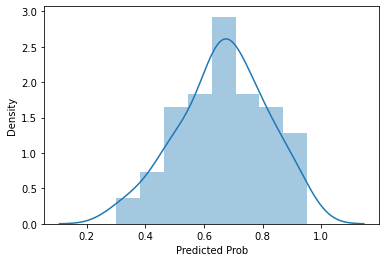

In [46]:
# Distribution of Pred Prob of actual class=0
sns.distplot(pred_df[pred_df['Actual Class']==0]['Predicted Prob']);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


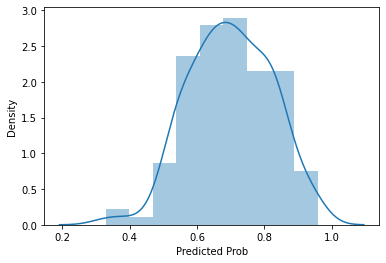

In [47]:
# Distribution of Pred Prob of actual class=1
sns.distplot(pred_df[pred_df['Actual Class']==1]['Predicted Prob']);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


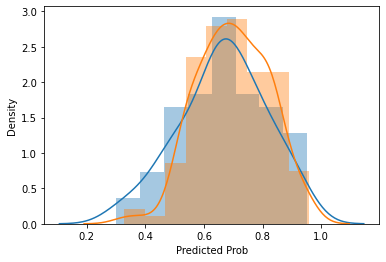

In [48]:
# Distribution of Pred Prob of actual class=0 and 1
sns.distplot(pred_df[pred_df['Actual Class']==0]['Predicted Prob'])

sns.distplot(pred_df[pred_df['Actual Class']==1]['Predicted Prob']);


## ROC curve

Receiver Operating Characteristics curve

FPR (sensitivity) ===> Along X-axis 

TPR ( 1- specificity). ===> Along Y- axis

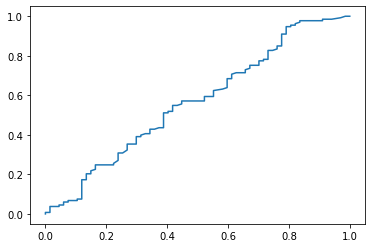

In [49]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(pred_df['Actual Class'],
                           pred_df['Predicted Prob'])
plt.plot(fpr,tpr);

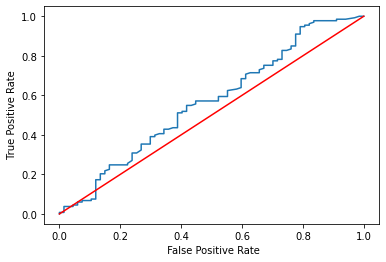

In [50]:
plt.plot(fpr,tpr)

plt.plot([0,1],[0,1],c='r')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate');

## ROC-AUC-Score
Area Under the ROC curve




In [52]:
from sklearn.metrics import roc_auc_score

score=roc_auc_score(pred_df['Actual Class'],
                   pred_df['Predicted Class'])
print('The ROC-AUC-Score:',score)

The ROC-AUC-Score: 0.5708113567500841


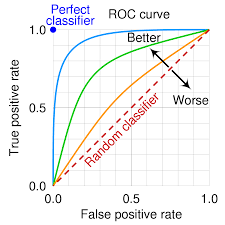

## Finding optimized classification cut-off

Instead of the default value of 0.5


Many techniques:

Youden's index

Y = Max{ Sensitivity + Specificity -1}

  = Max{ Sensitivity - (1- Specificity)}
  
  = Max{ FPR - TPR}

In [54]:
# Create a DF

fpr_tpr=pd.DataFrame({'FPR':fpr,
                     'TPR':tpr,
                     'Threshold':threshold})

In [55]:
fpr_tpr

,FPR,TPR,Threshold
0,0.000000,0.000000,1.958436
1,0.000000,0.007519,0.958436
2,0.014925,0.007519,0.952478
3,0.014925,0.037594,0.928304
4,0.044776,0.037594,0.920128
...,...,...,...
102,0.910448,0.984962,0.460934
103,0.940299,0.984962,0.421208
104,0.970149,0.992481,0.385243
105,0.985075,1.000000,0.327971


In [62]:
fpr_tpr['Diff']=np.abs(fpr_tpr['FPR']- fpr_tpr['TPR'])
fpr_tpr

,FPR,TPR,Threshold,Diff
0,0.000000,0.000000,1.958436,0.000000
1,0.000000,0.007519,0.958436,0.007519
2,0.014925,0.007519,0.952478,0.007407
3,0.014925,0.037594,0.928304,0.022669
4,0.044776,0.037594,0.920128,0.007182
...,...,...,...,...
102,0.910448,0.984962,0.460934,0.074515
103,0.940299,0.984962,0.421208,0.044664
104,0.970149,0.992481,0.385243,0.022332
105,0.985075,1.000000,0.327971,0.014925


In [63]:
# Sorting Diff

fpr_tpr.sort_values('Diff',ascending=False)

,FPR,TPR,Threshold,Diff
94,0.791045,0.947368,0.526841,0.156324
96,0.805970,0.954887,0.521594,0.148917
93,0.791045,0.939850,0.527421,0.148805
100,0.835821,0.977444,0.504669,0.141623
98,0.820896,0.962406,0.513231,0.141510
...,...,...,...,...
13,0.119403,0.112782,0.841977,0.006621
7,0.059701,0.060150,0.886809,0.000449
5,0.044776,0.045113,0.900766,0.000337
0,0.000000,0.000000,1.958436,0.000000


In [ ]:
Remark:
    
    The best optimum cut off is 0.526841, correponding 
    to the Max.
    
    

In [64]:
# USe this cutoff

pred_df['New Predicted Class']=pred_df['Predicted Prob'].map(
                    lambda x: 1 if x> 0.526841 else 0)

In [65]:
pred_df

,Actual Class,Predicted Prob,Predicted Class,New Predicted Class
841,0,0.690284,1,1
956,0,0.884680,1,1
544,1,0.850290,1,1
173,1,0.657965,1,1
759,0,0.512259,1,0
...,...,...,...,...
274,1,0.687278,1,1
192,1,0.385243,0,0
398,1,0.807991,1,1
450,0,0.927365,1,1


In [66]:
new_score= roc_auc_score(pred_df['Actual Class'],
                        pred_df['New Predicted Class'])

print(' The new ROC-AUC-Score:',new_score)

 The new ROC-AUC-Score: 0.5744024239703737


In [67]:
new_cm= confusion_matrix(pred_df['Actual Class'],
                        pred_df['New Predicted Class'])
print(' The new Confusion Matrix:\n',new_cm)

 The new Confusion Matrix:
 [[ 14  53]
 [  8 125]]
